In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('titanic_clean.csv')

In [4]:
x_data = df.drop(['Unnamed: 0', 'Survived'], axis=1)
y_survived = df.Survived

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size=0.3, random_state=42)

In [6]:
dtcModel = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dtcModel.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
y_predict = dtcModel.predict(x_test)

In [10]:
cm = confusion_matrix(y_test, y_predict)

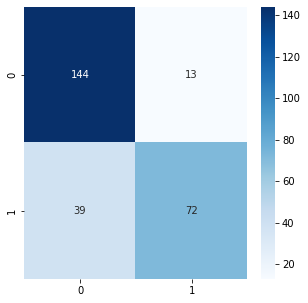

In [11]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.65      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [14]:
export_graphviz(dtcModel, out_file='tree.dot', filled=True, feature_names= ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'])